<a href="https://colab.research.google.com/github/BhammarArjun/PyTorch/blob/main/PyTorch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRiS Dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1 = 8, h2= 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    out1 = F.relu(self.fc1(x))
    out2 = F.relu(self.fc2(out1))
    out = self.out(out2)
    return out


In [6]:
# Pick a seed
torch.manual_seed(500)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [9]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [11]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [12]:
# Categorical encoding

my_df['variety'] = my_df['variety'].map({'Setosa':0.0, 'Versicolor':1.0, 'Virginica': 2.0})
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
## Train and Test split
X = my_df.drop('variety',axis = 1)
y = my_df['variety']


## Converting to Numpy
X = X.values
y = y.values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 500)


In [16]:
# Converting to tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [19]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
## Set the criteria to measure the error
model = Model()
criterion = nn.CrossEntropyLoss()

# Chosse Adam Optimizer and Learning rate

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [44]:
## Train our Model

epochs = 500

losses = []
model.train()

for i in range(epochs):
  #Go for it
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i %10 == 0:
    print(f"Epoch: {i}, Loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0, Loss: 1.1149474382400513
Epoch: 10, Loss: 0.9242236614227295
Epoch: 20, Loss: 0.7821915745735168
Epoch: 30, Loss: 0.6427585482597351
Epoch: 40, Loss: 0.5210840702056885
Epoch: 50, Loss: 0.46990177035331726
Epoch: 60, Loss: 0.4429846405982971
Epoch: 70, Loss: 0.41956254839897156
Epoch: 80, Loss: 0.3326537013053894
Epoch: 90, Loss: 0.21979117393493652
Epoch: 100, Loss: 0.12339227646589279
Epoch: 110, Loss: 0.08513971418142319
Epoch: 120, Loss: 0.06735455244779587
Epoch: 130, Loss: 0.05902183800935745
Epoch: 140, Loss: 0.054593075066804886
Epoch: 150, Loss: 0.051798202097415924
Epoch: 160, Loss: 0.049796588718891144
Epoch: 170, Loss: 0.04823329299688339
Epoch: 180, Loss: 0.046941135078668594
Epoch: 190, Loss: 0.04582883045077324
Epoch: 200, Loss: 0.04483867436647415
Epoch: 210, Loss: 0.04393462464213371
Epoch: 220, Loss: 0.04315771907567978
Epoch: 230, Loss: 0.04240916296839714
Epoch: 240, Loss: 0.04158859699964523
Epoch: 250, Loss: 0.040886688977479935
Epoch: 260, Loss: 0.04021

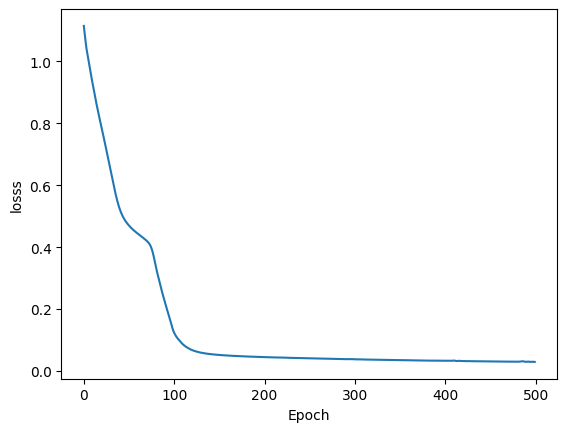

In [45]:
plt.plot(range(epochs), losses)
plt.ylabel('losss')
plt.xlabel('Epoch')
plt.show()

In [60]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
  print(loss)

tensor(0.1033)


In [56]:
y_pred_test = torch.argmax(y_eval, dim =1)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [61]:
# $$ THanks $$